In [234]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt


#### load the movie dataset and create their dataframes
df = pd.read_csv("Database Commuting Time.csv")
df.head()

,unique_household_identifier,province,gender,age,race,level_of_difficulty_walking_1_km,need_for_walking_assistance,need_for_wheelchair,social_grant,old_age_grant,...,minutes_waiting_for_first_transport_mode,minutes_walking_from_final_transport_mode,age_group,total_travel_time,total_cost_of_transport,geo_location,quintile,total_monthly_household_income,total_monthly_salary,weight
0,160100091000004000,Western Cape,Female,35,Coloured,No difficulty,No,No,No,Not applicable,...,Not applicable,Not applicable,35-39 years,Not applicable,Not applicable,Rural,Quintile 3,2100,Not applicable,2567075308
1,160100091000004000,Western Cape,Male,38,Coloured,No difficulty,No,No,No,Not applicable,...,Unspecified,Unspecified,35-39 years,Unspecified,Unspecified,Rural,Quintile 3,2100,2100,2567075308
2,160100091000004000,Western Cape,Female,9,Coloured,No difficulty,No,No,No,Not applicable,...,Not applicable,Not applicable,05-09 years,Not applicable,Not applicable,Rural,Quintile 3,2100,Not applicable,2567075308
3,160100091000008000,Western Cape,Male,40,Coloured,No difficulty,No,No,No,Not applicable,...,Not applicable,Not applicable,40-44 years,10,Not applicable,Rural,Quintile 4,4192,2096,2433117637
4,160100091000008000,Western Cape,Female,32,Coloured,No difficulty,No,No,No,Not applicable,...,Not applicable,Not applicable,30-34 years,10,Not applicable,Rural,Quintile 4,4192,2096,2433117637


In [235]:
#df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   unique_household_identifier                        1000 non-null   int64  
 1   province                                           1000 non-null   object 
 2   gender                                             1000 non-null   object 
 3   age                                                1000 non-null   int64  
 4   race                                               1000 non-null   object 
 5   level_of_difficulty_walking_1_km                   1000 non-null   object 
 6   need_for_walking_assistance                        1000 non-null   object 
 7   need_for_wheelchair                                1000 non-null   object 
 8   social_grant                                       1000 non-null   object 
 9   old_age_g

In [236]:
df.shape

(1000, 44)

In [237]:
#Imputation of missing values
df = df.replace('Not applicable', '0')
df = df.replace('Unspecified', '0')
df = df.replace('Working from home', '0')

In [238]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count[0:]

unique_household_identifier                            0
province                                               0
gender                                                 0
age                                                    0
race                                                   0
level_of_difficulty_walking_1_km                       0
need_for_walking_assistance                            0
need_for_wheelchair                                    0
social_grant                                           0
old_age_grant                                          0
days_per_week_walking_as_main_mode_of_transport      283
why_do_they_walk_all_the_way                           0
highest_level_of_education                             0
employement_status                                     0
workplace_location                                     0
workplace_province                                     0
workplace_district                                     0
work_days_per_week             

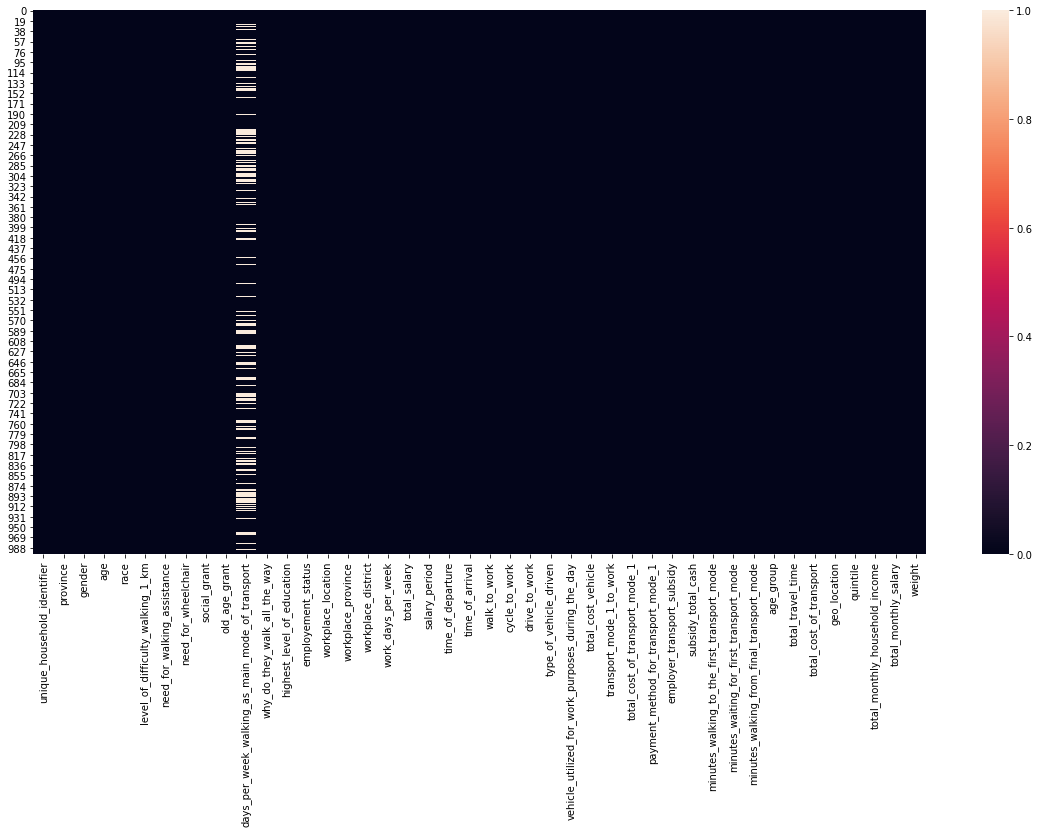

In [135]:
#missing data visualization[heatmap]
plt.figure(figsize = (20,10))
sns.heatmap(df.isnull());

In [239]:
#Data Cleaning-Identify columns that are redundant or unnecessary
#Drop all the column we have no need for:
#Province variable, only one Province is seen through out the whole data frame. We therefore do not need this variable
#Remove the following columns from the data set as they will not be used in the analysis .
df.drop( ['province', 'level_of_difficulty_walking_1_km', 'need_for_walking_assistance',
          'social_grant', 'need_for_wheelchair', 'old_age_grant', 'workplace_location', 
          'workplace_province', 'workplace_district',
         'walk_to_work','cycle_to_work','drive_to_work','type_of_vehicle_driven',
         'vehicle_utilized_for_work_purposes_during_the_day',
         'total_cost_vehicle','transport_mode_1_to_work','total_cost_of_transport_mode_1',
         'payment_method_for_transport_mode_1','minutes_walking_to_the_first_transport_mode',
         'minutes_waiting_for_first_transport_mode','minutes_walking_from_final_transport_mode',
         'age_group','total_cost_of_transport','weight','employer_transport_subsidy',
         'subsidy_total_cash','why_do_they_walk_all_the_way'] ,inplace=True, axis=1)
df.head()
print('After removing some useles columns we will be left with 16 columns which will be used for futher analysis')
#df.info()

After removing some useles columns we will be left with 16 columns which will be used for futher analysis


In [240]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    #print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
#else:
    #print("No duplicated entries found")

No. of duplicated entries:  2


In [241]:
df = df.drop_duplicates()

In [242]:
#view data types for each column
df.dtypes

unique_household_identifier                          int64
gender                                              object
age                                                  int64
race                                                object
days_per_week_walking_as_main_mode_of_transport    float64
highest_level_of_education                          object
employement_status                                  object
work_days_per_week                                  object
total_salary                                        object
salary_period                                       object
time_of_departure                                   object
time_of_arrival                                     object
total_travel_time                                   object
geo_location                                        object
quintile                                            object
total_monthly_household_income                       int64
total_monthly_salary                                obje

In [230]:
print(""""The use different exploratory data analysis and visualization techniques to have a better understanding 
of the commutting data set. Summarizing the main characteristics of the data set, finding representative 
or critical points in the data set, and finding the relevant features.""")

"The use different exploratory data analysis and visualization techniques to have a better understanding 
of the commutting data set. Summarizing the main characteristics of the data set, finding representative 
or critical points in the data set, and finding the relevant features.


Female    515
Male      483
Name: gender, dtype: int64


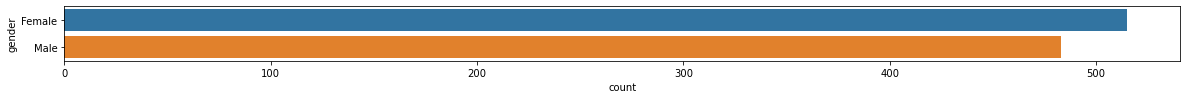

In [243]:
# From the Given Population How many  are Male and Female
fig = plt.figure(figsize=(20,1))
sns.countplot(y='gender', data=df);
print(df.gender.value_counts())
#More females commute compared to males

Coloured         769
White            121
African/Black    109
Indian/asian       1
Name: race, dtype: int64


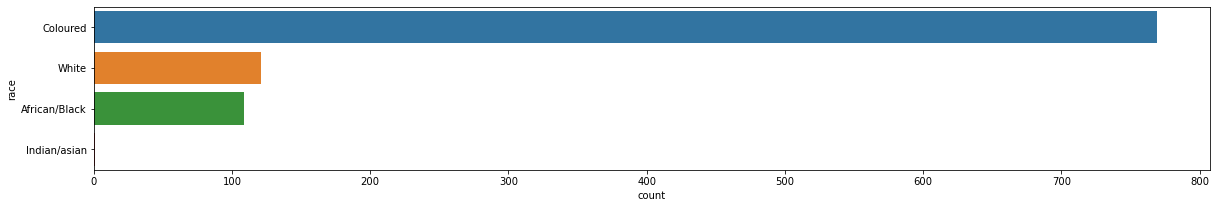

In [232]:
# Make a race comparison
fig = plt.figure(figsize=(20,3))
sns.countplot(y='race', data=df);
print(df.race.value_counts())

Urban    846
Rural    149
Metro      3
Name: geo_location, dtype: int64


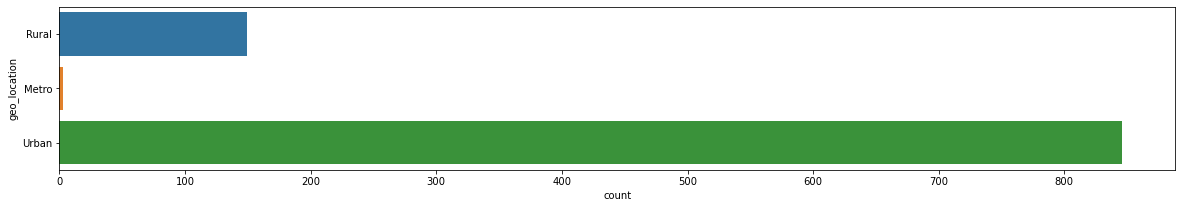

In [181]:
fig = plt.figure(figsize=(20,3))
sns.countplot(y='geo_location', data=df);
print(df.geo_location.value_counts())

Grade 12/Standard 10/Form 5/Matric (No Exemption)    197
No schooling                                         114
Grade 10/ Standard 8/ Form 3                         112
Grade 8/Standard 6/Form 1                            100
Grade 7/Standard 5/ ABET 3                            72
Grade 9/Standard 7/Form 2/ ABET 4                     67
Grade 6/Standard 4                                    49
Grade 11/ Standard 9/ Form 4                          42
Grade 5/ Standard 3/ ABET 2                           37
Grade 4/ Standard 2                                   35
Grade 3/Standard 1/ ABET 1(Kha Ri Gude, Sanli)        34
Unspecified                                           30
Grade 2 / Sub B/Class 2                               21
Grade 1/ Sub A/Class 1                                17
Grade R/00                                            16
Diploma with Grade 12/Std 10                          11
Do not know                                            9
Higher Diploma (Technikon)     

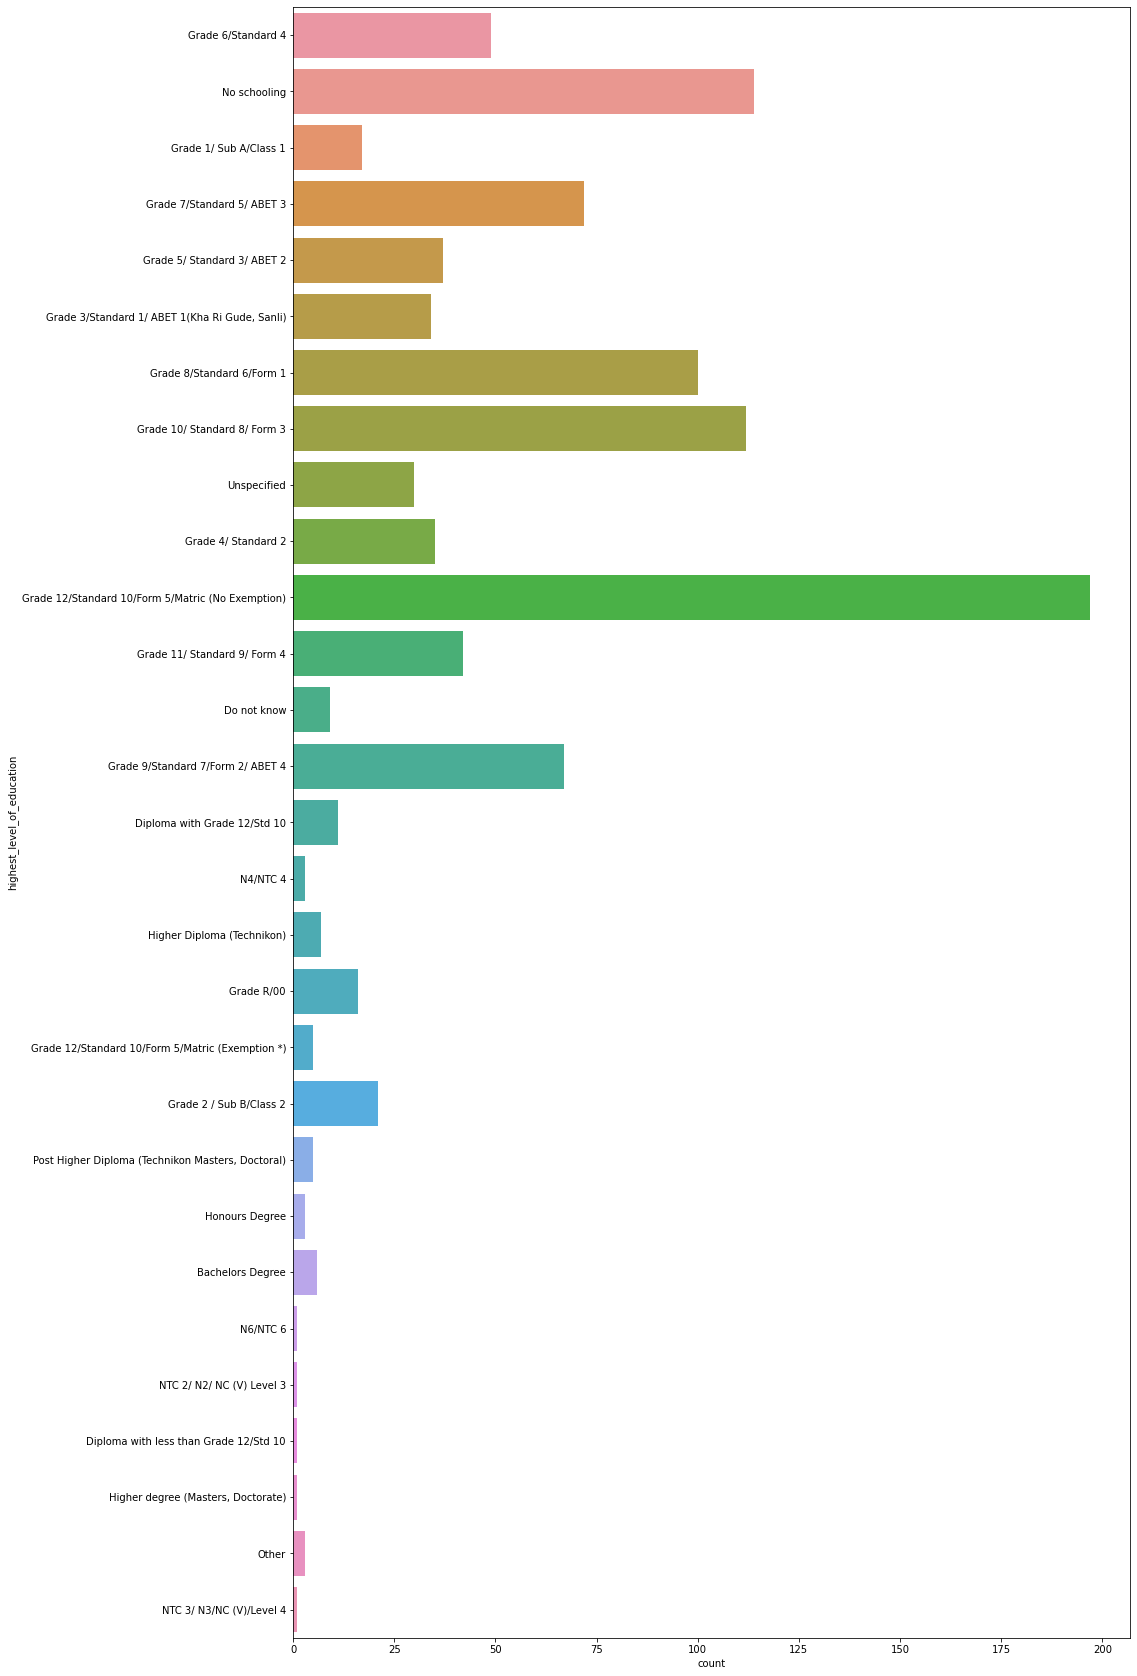

In [97]:
#checking the different levels of edcucation.
fig = plt.figure(figsize=(15,30))
sns.countplot(y='highest_level_of_education', data=df);
print(df.highest_level_of_education.value_counts())

No                                  378
Yes - formal sector (registered)    339
0                                   244
Yes - informal sector                37
Name: employement_status, dtype: int64


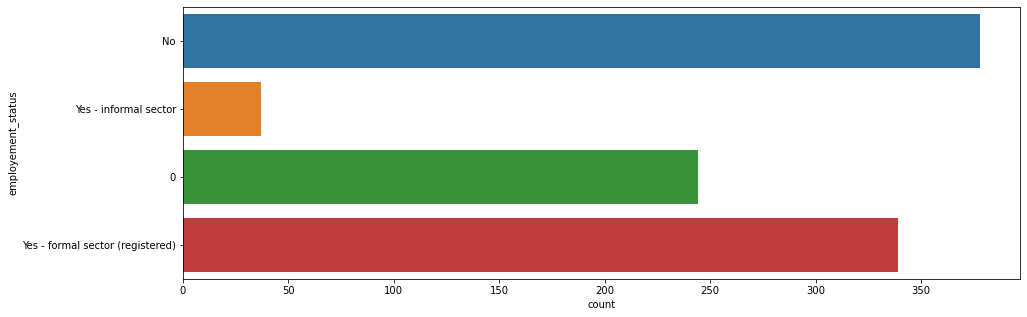

In [244]:
#Employment status
fig = plt.figure(figsize=(15,5))
sns.countplot(y='employement_status', data=df);
print(df.employement_status.value_counts())
#the Null Value needs to be removed or replaced with a mode value

0            755
Per month    138
Per week     105
Name: salary_period, dtype: int64


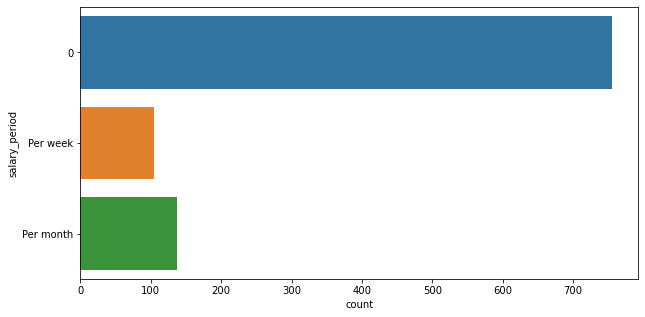

In [245]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y='salary_period', data=df);
print(df.salary_period.value_counts())

In [106]:
household = df.groupby('unique_household_identifier').size()
print(household)

unique_household_identifier
160100091000004000    3
160100091000008000    2
160100091000011000    1
160100091000016000    4
160100161000000000    5
                     ..
166102551000012000    2
171101601000004000    1
199114921000000000    1
199117001000004000    1
199142331000003000    1
Length: 256, dtype: int64


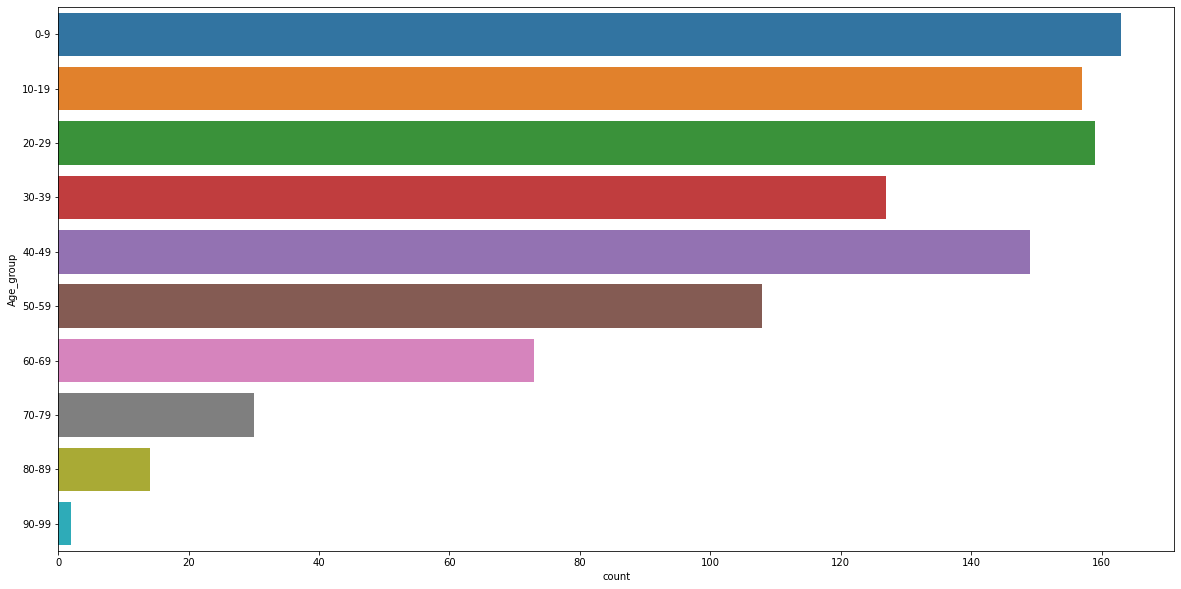

In [246]:
#age groups
df['Age_group'] = pd.cut(df['age'], [0,10,20, 29, 39,49, 59,69,79,89,99], 
                   labels=['0-9','10-19','20-29', '30-39', '40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df['Age_group'], data=df);

The plot below show the monthly household income according to race.
It show that whites have a huge income range compared to the other races



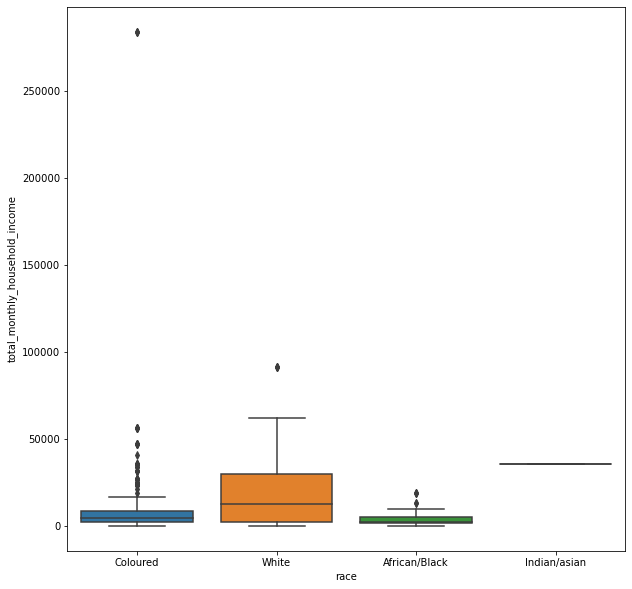

In [247]:
print("""The plot below show the monthly household income according to race.
It show that whites have a huge income range compared to the other races
""")

plt.figure(figsize = (10,10))
sns.boxplot(x='race',y='total_monthly_household_income',data=df);
plt.xticks(rotation = 0)
plt.show()

In [248]:
missing_values_count = df.isnull().sum()
missing_values_count[0:]

unique_household_identifier                          0
gender                                               0
age                                                  0
race                                                 0
days_per_week_walking_as_main_mode_of_transport    283
highest_level_of_education                           0
employement_status                                   0
work_days_per_week                                   0
total_salary                                         0
salary_period                                        0
time_of_departure                                    0
time_of_arrival                                      0
total_travel_time                                    0
geo_location                                         0
quintile                                             0
total_monthly_household_income                       0
total_monthly_salary                                 0
Age_group                                           16
dtype: int

In [249]:
df.drop( ['days_per_week_walking_as_main_mode_of_transport'] ,inplace=True, axis=1)

In [250]:
df['work_days_per_week'] = df['work_days_per_week'].astype(int)
df['total_travel_time'] = df['total_travel_time'].astype(int)
df['total_salary'] = df['total_salary'].astype(float)
#Converting the data types
df['unique_household_identifier'] = df['unique_household_identifier'].astype(object)

In [251]:
df.dtypes

unique_household_identifier         object
gender                              object
age                                  int64
race                                object
highest_level_of_education          object
employement_status                  object
work_days_per_week                   int32
total_salary                       float64
salary_period                       object
time_of_departure                   object
time_of_arrival                     object
total_travel_time                    int32
geo_location                        object
quintile                            object
total_monthly_household_income       int64
total_monthly_salary                object
Age_group                         category
dtype: object

In [252]:
df.corr()

,age,work_days_per_week,total_salary,total_travel_time,total_monthly_household_income
age,1.000000,0.177864,0.065495,0.129380,-0.022896
work_days_per_week,0.177864,1.000000,0.166315,0.604768,0.074098
total_salary,0.065495,0.166315,1.000000,0.112656,0.477297
total_travel_time,0.129380,0.604768,0.112656,1.000000,0.048844
total_monthly_household_income,-0.022896,0.074098,0.477297,0.048844,1.000000


In [253]:
df.describe()

,age,work_days_per_week,total_salary,total_travel_time,total_monthly_household_income
count,998.000000,998.000000,998.000000,998.000000,998.000000
mean,32.397796,1.736473,1300.927856,9.737475,9081.502004
std,20.897444,2.503296,9382.713679,19.912225,18909.858397
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,2229.000000
50%,30.000000,0.000000,0.000000,0.000000,4540.000000
75%,48.000000,5.000000,0.000000,15.000000,9481.500000
max,93.000000,7.000000,284000.000000,180.000000,284000.000000


Checking correlation between different variables


<AxesSubplot:>

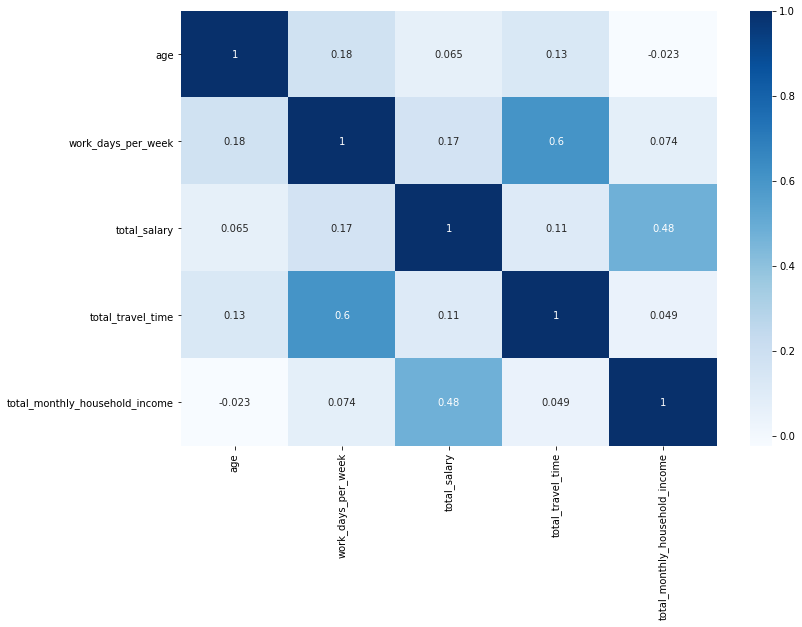

In [254]:
print('Checking correlation between different variables')
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True, cmap='Blues')

DOES RACE INFLUENCE COMMUTING TIME


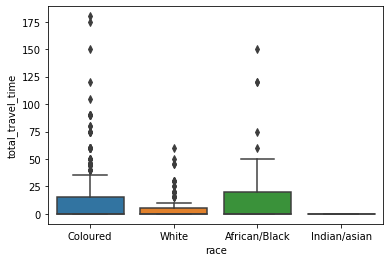

In [255]:
print("DOES RACE INFLUENCE COMMUTING TIME")
sns.boxplot(x='race',y='total_travel_time',data=df);

DOES LOCATION INFLUENCE COMMUTING TIME


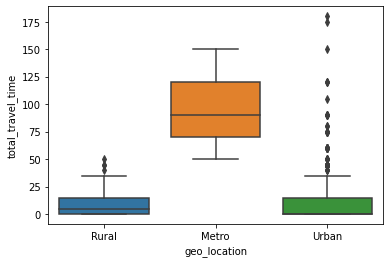

In [256]:
print("DOES LOCATION INFLUENCE COMMUTING TIME")
sns.boxplot(x='geo_location',y='total_travel_time',data=df);
#Metro shows longer commuting times

DOES AGE INFLUENCE COMMUTING TIME


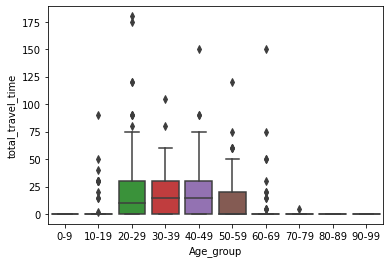

In [213]:
print("DOES AGE INFLUENCE COMMUTING TIME")
sns.boxplot(x='Age_group',y='total_travel_time',data=df);
#from the boxplot the longer commuting time is found in age groups between 20 to 49  

(0.0, 298200.0)

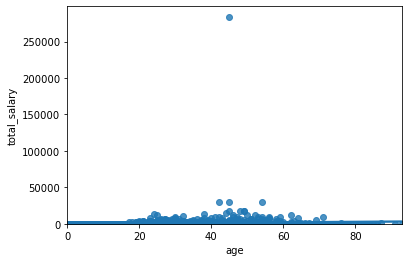

In [220]:
sns.regplot(x="age", y="total_salary", data=df)
plt.ylim(0,)

(0.0, 298200.0)

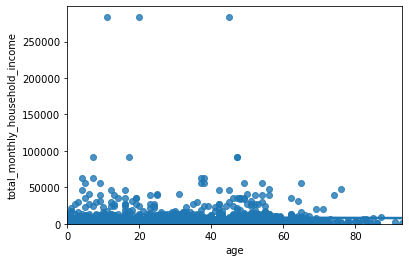

In [221]:
sns.regplot(x="age", y="total_monthly_household_income", data=df)
plt.ylim(0,)